# Credit Risk Prediction - Model Training & Evaluation
## Complete Step-by-Step Machine Learning Pipeline

This notebook walks through the entire machine learning pipeline for credit risk prediction:
- Data loading and preprocessing
- Feature encoding and scaling
- Model training (Logistic Regression & Decision Tree)
- Model evaluation and comparison
- Model deployment preparation

---
## STEP 1: Install Required Libraries
---

In [1]:
# Install necessary libraries
%pip install scikit-learn
%pip install kagglehub

---
## STEP 2: Import Libraries
---

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model persistence
import pickle

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---
---
# 📊 STEP 3: LOAD THE CLEANED DATASET
---

We're loading the dataset that was cleaned in the previous data cleaning notebook.
This dataset has:
- No missing values
- Outliers handled
- Proper age range (18-100)
- Valid employment length (0-60 years)

In [ ]:
# Load the cleaned dataset
df = pd.read_csv("cleaned_credit_risk.csv")

print("✅ Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nFirst 5 rows:")
df.head()q

✅ Dataset loaded successfully!

Dataset Shape: 32,576 rows × 12 columns

First 5 rows:


,person_age,person_income($),person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt($),loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,60.0,PERSONAL,D,23000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,23000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,23000,14.27,1,0.55,Y,4


### Explore the Dataset Structure

In [4]:
# Display dataset information
print("Dataset Information:")
print("="*60)
df.info()

print("\n" + "="*60)
print("Column Names:")
print("="*60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32576 entries, 0 to 32575
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32576 non-null  int64  
 1   person_income($)            32576 non-null  int64  
 2   person_home_ownership       32576 non-null  object 
 3   person_emp_length           32576 non-null  float64
 4   loan_intent                 32576 non-null  object 
 5   loan_grade                  32576 non-null  object 
 6   loan_amnt($)                32576 non-null  int64  
 7   loan_int_rate               32576 non-null  float64
 8   loan_status                 32576 non-null  int64  
 9   loan_percent_income         32576 non-null  float64
 10  cb_person_default_on_file   32576 non-null  object 
 11  cb_person_cred_hist_length  32576 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB

Column Na

### Check Data Quality

In [5]:
# Verify no missing values
print("Missing Values Check:")
print("="*60)
missing = df.isnull().sum()
print(missing)
print(f"\n✅ Total missing values: {missing.sum()}")

if missing.sum() == 0:
    print("\n🎉 Perfect! Dataset is clean and ready for modeling!")

Missing Values Check:
person_age                    0
person_income($)              0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt($)                  0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

✅ Total missing values: 0

🎉 Perfect! Dataset is clean and ready for modeling!


### Statistical Summary

In [6]:
# Statistical summary
print("Statistical Summary:")
print("="*60)
df.describe()

Statistical Summary:


,person_age,person_income($),person_emp_length,loan_amnt($),loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32576.000000,3.257600e+04,32576.000000,32576.000000,32576.000000,32576.000000,32576.000000,32576.000000
mean,27.718044,6.588214e+04,4.763967,9407.398084,11.009486,0.218197,0.170212,5.803966
std,6.204990,5.253499e+04,4.004518,5812.728018,3.081794,0.413029,0.106778,4.053791
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,60.000000,23000.000000,23.220000,1.000000,0.830000,30.000000


---
---
# 🎯 STEP 4: UNDERSTAND THE TARGET VARIABLE
---

## What are we predicting?
- **Target Variable**: `loan_status`
- **Task**: Binary Classification
  - `0` = Good loan (customer will repay)
  - `1` = Bad loan (customer will default)

## Why did we drop `loan_grade`?
- `loan_grade` is often assigned based on the loan status
- Including it would cause **data leakage**
- It's not a feature we'd have at prediction time

In [7]:
# Analyze target variable
print("Target Variable Analysis: loan_status")
print("="*60)
print("\nValue Counts:")
print(df['loan_status'].value_counts())

print("\nPercentage Distribution:")
print(df['loan_status'].value_counts(normalize=True) * 100)

Target Variable Analysis: loan_status

Value Counts:
loan_status
0    25468
1     7108
Name: count, dtype: int64

Percentage Distribution:
loan_status
0    78.180255
1    21.819745
Name: proportion, dtype: float64


### Plot 1: Target Variable Distribution

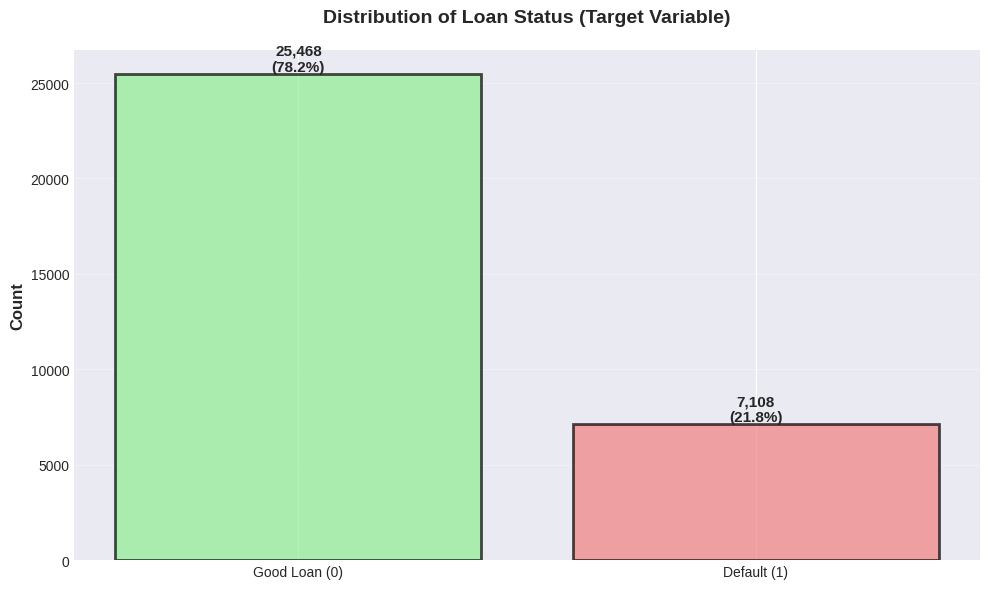


📊 Class Ratio (Good:Bad): 3.58:1
⚠️  Dataset is imbalanced! Consider techniques like SMOTE, class weights, or stratified sampling.


In [ ]:
# Visualize target variable distribution
plt.figure(figsize=(10, 6))
counts = df['loan_status'].value_counts()
colors = ['lightgreen', 'lightcoral']
bars = plt.bar(['Good Loan (0)', 'Default (1)'], counts.values, color=colors,
               edgecolor='black', linewidth=2, alpha=0.7)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, counts.values)):
    height = bar.get_height()
    percentage = (count / len(df)) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Loan Status (Target Variable)', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Check for class imbalance
class_ratio = counts.values[0] / counts.values[1]
print(f"\n📊 Class Ratio (Good:Bad): {class_ratio:.2f}:1")

if class_ratio > 3 or class_ratio < 0.33:
    print("⚠️  Dataset is imbalanced! Consider techniques like SMOTE, class weights, or stratified sampling.")
else:
    print("✅ Dataset is reasonably balanced!")

---
---
# 🔀 STEP 5: SEPARATE FEATURES AND TARGET
---

## What are we doing?
- **X (Features)**: All columns except `loan_status` and `loan_grade`
- **y (Target)**: Only `loan_status`

## Why drop loan_grade?
- It's highly correlated with the target
- Would cause **data leakage** (information from the future)
- Not available at prediction time in real-world scenarios

In [8]:
# Separate features (X) and target (y)
X = df.drop(["loan_status", "loan_grade"], axis=1)
y = df["loan_status"]

print("✅ Features and Target Separated!")
print("="*60)
print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

print(f"\nFeature columns ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    dtype = X[col].dtype
    print(f"  {i:2d}. {col:30s} - {dtype}")

✅ Features and Target Separated!

Features (X) shape: (32576, 10)
Target (y) shape: (32576,)

Feature columns (10):
   1. person_age                     - int64
   2. person_income($)               - int64
   3. person_home_ownership          - object
   4. person_emp_length              - float64
   5. loan_intent                    - object
   6. loan_amnt($)                   - int64
   7. loan_int_rate                  - float64
   8. loan_percent_income            - float64
   9. cb_person_default_on_file      - object
  10. cb_person_cred_hist_length     - int64


### Identify Data Types

In [9]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Column Type Analysis:")
print("="*60)
print(f"\nNumerical columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  • {col}")

print(f"\nCategorical columns ({len(categorical_cols)}):")
for col in categorical_cols:
    unique_count = X[col].nunique()
    print(f"  • {col} ({unique_count} unique values)")

Column Type Analysis:

Numerical columns (7):
  • person_age
  • person_income($)
  • person_emp_length
  • loan_amnt($)
  • loan_int_rate
  • loan_percent_income
  • cb_person_cred_hist_length

Categorical columns (3):
  • person_home_ownership (4 unique values)
  • loan_intent (6 unique values)
  • cb_person_default_on_file (2 unique values)


---
---
# 🔤 STEP 6: ENCODE CATEGORICAL VARIABLES
---

## Why do we need encoding?
Machine learning algorithms work with **numbers**, not text. We need to convert categorical variables into numerical format.

## What is Label Encoding?
Label Encoding assigns a unique integer to each category:
- Example: `['RENT', 'OWN', 'MORTGAGE']` → `[0, 1, 2]`

## Categorical columns to encode:
1. **person_home_ownership**: RENT, OWN, MORTGAGE, etc.
2. **loan_intent**: EDUCATION, MEDICAL, PERSONAL, etc.
3. **cb_person_default_on_file**: Y (Yes), N (No)

## Why save encoders?
We need the **same encoding** for future predictions!

In [10]:
# Define categorical columns to encode
cat_cols = [
    "person_home_ownership",
    "loan_intent",
    "cb_person_default_on_file"
]

print("Categorical Columns to Encode:")
print("="*60)
for col in cat_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {X[col].unique()}")
    print(f"  Count: {X[col].nunique()} categories")

Categorical Columns to Encode:

person_home_ownership:
  Unique values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
  Count: 4 categories

loan_intent:
  Unique values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
  Count: 6 categories

cb_person_default_on_file:
  Unique values: ['Y' 'N']
  Count: 2 categories


### Before Encoding - Visualize Categorical Distributions

### Plot 2: Person Home Ownership Distribution

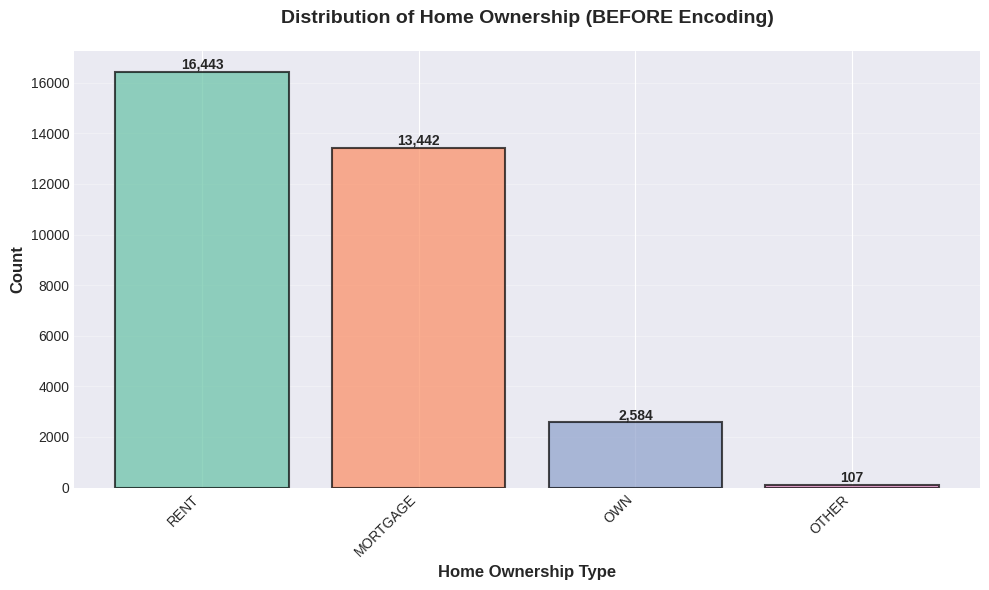


📊 Home Ownership Distribution:
person_home_ownership
RENT        16443
MORTGAGE    13442
OWN          2584
OTHER         107
Name: count, dtype: int64


In [11]:
# Visualize person_home_ownership
plt.figure(figsize=(10, 6))
home_counts = X['person_home_ownership'].value_counts()
colors = sns.color_palette('Set2', len(home_counts))
bars = plt.bar(home_counts.index, home_counts.values, color=colors,
               edgecolor='black', linewidth=1.5, alpha=0.7)

# Add value labels
for bar, count in zip(bars, home_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xlabel('Home Ownership Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Home Ownership (BEFORE Encoding)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Home Ownership Distribution:")
print(home_counts)

### Plot 3: Loan Intent Distribution

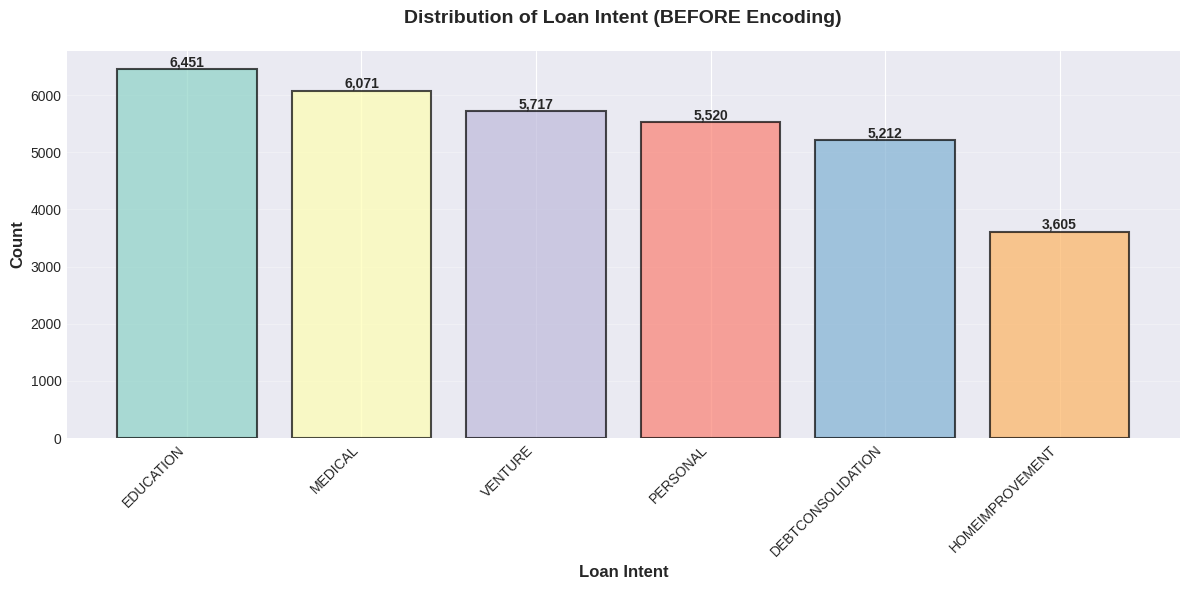


📊 Loan Intent Distribution:
loan_intent
EDUCATION            6451
MEDICAL              6071
VENTURE              5717
PERSONAL             5520
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


In [12]:
# Visualize loan_intent
plt.figure(figsize=(12, 6))
intent_counts = X['loan_intent'].value_counts()
colors = sns.color_palette('Set3', len(intent_counts))
bars = plt.bar(intent_counts.index, intent_counts.values, color=colors,
               edgecolor='black', linewidth=1.5, alpha=0.7)

# Add value labels
for bar, count in zip(bars, intent_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xlabel('Loan Intent', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Loan Intent (BEFORE Encoding)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Loan Intent Distribution:")
print(intent_counts)

### Plot 4: Default on File Distribution

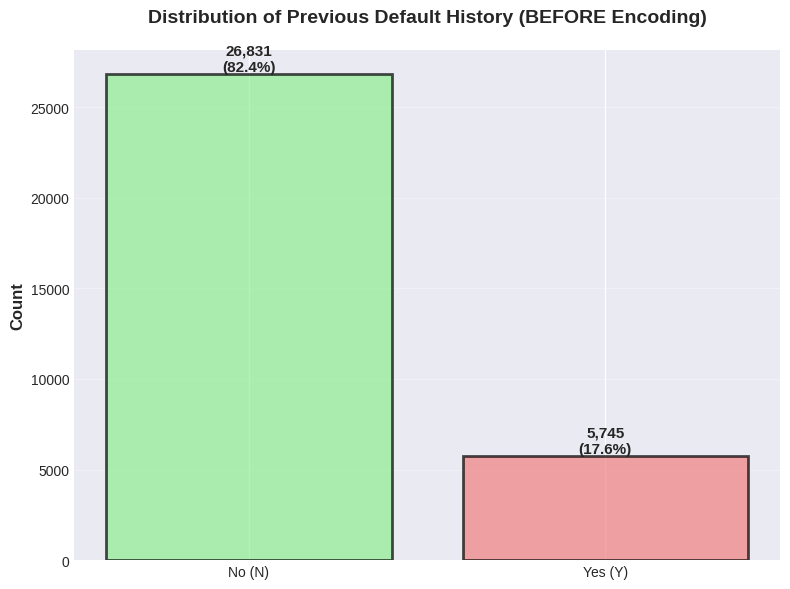


📊 Default History Distribution:
cb_person_default_on_file
N    26831
Y     5745
Name: count, dtype: int64


In [13]:
# Visualize cb_person_default_on_file
plt.figure(figsize=(8, 6))
default_counts = X['cb_person_default_on_file'].value_counts()
colors = ['lightgreen', 'lightcoral']
bars = plt.bar(['No (N)', 'Yes (Y)'], default_counts.values, color=colors,
               edgecolor='black', linewidth=2, alpha=0.7)

# Add value labels
for bar, count in zip(bars, default_counts.values):
    height = bar.get_height()
    percentage = (count / len(X)) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Previous Default History (BEFORE Encoding)',
         fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Default History Distribution:")
print(default_counts)

### Perform Label Encoding

In [14]:
# Initialize encoder storage
encoders = {}

print("Encoding Categorical Variables...")
print("="*60)

# Encode each categorical column
for col in cat_cols:
    print(f"\nEncoding: {col}")

    # Show original values
    print(f"  Original values: {X[col].unique()}")

    # Create and fit encoder
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

    # Store encoder for later use
    encoders[col] = le

    # Show encoded values
    print(f"  Encoded values: {X[col].unique()}")

    # Show mapping
    print(f"  Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\n✅ All categorical variables encoded successfully!")
print(f"✅ Encoders saved: {list(encoders.keys())}")

Encoding Categorical Variables...

Encoding: person_home_ownership
  Original values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
  Encoded values: [3 2 0 1]
  Mapping: {'MORTGAGE': np.int64(0), 'OTHER': np.int64(1), 'OWN': np.int64(2), 'RENT': np.int64(3)}

Encoding: loan_intent
  Original values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
  Encoded values: [4 1 3 5 2 0]
  Mapping: {'DEBTCONSOLIDATION': np.int64(0), 'EDUCATION': np.int64(1), 'HOMEIMPROVEMENT': np.int64(2), 'MEDICAL': np.int64(3), 'PERSONAL': np.int64(4), 'VENTURE': np.int64(5)}

Encoding: cb_person_default_on_file
  Original values: ['Y' 'N']
  Encoded values: [1 0]
  Mapping: {'N': np.int64(0), 'Y': np.int64(1)}

✅ All categorical variables encoded successfully!
✅ Encoders saved: ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']


### Verify Encoding

In [16]:
# Check data types after encoding
print("Data Types After Encoding:")
print("="*60)
print(X.dtypes)

print("\n📊 First 5 rows after encoding:")
X.head()

Data Types After Encoding:
person_age                      int64
person_income($)                int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_amnt($)                    int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
dtype: object

📊 First 5 rows after encoding:


,person_age,person_income($),person_home_ownership,person_emp_length,loan_intent,loan_amnt($),loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,60.0,4,23000,16.02,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,0.57,0,3
3,23,65500,3,4.0,3,23000,15.23,0.53,0,2
4,24,54400,3,8.0,3,23000,14.27,0.55,1,4


---
---
# ✂️ STEP 7: SPLIT DATA INTO TRAINING AND TEST SETS
---

## Why split the data?
- **Training Set (80%)**: Used to train the model
- **Test Set (20%)**: Used to evaluate model performance on unseen data

## Why 80-20 split?
- **80%**: Enough data for the model to learn patterns
- **20%**: Enough data for reliable performance evaluation
- Standard practice in machine learning

## What is random_state=42?
- Ensures **reproducibility**
- Same split every time we run the code
- Important for comparing results

In [17]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Maintain class distribution
)

print("✅ Data Split Completed!")
print("="*60)
print(f"\nOriginal dataset size:    {len(X):,} samples")
print(f"Training set size:        {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size:            {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nFeature dimensions:")
print(f"  X_train shape: {X_train.shape}")
print(f"  X_test shape:  {X_test.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  y_test shape:  {y_test.shape}")

✅ Data Split Completed!

Original dataset size:    32,576 samples
Training set size:        26,060 samples (80.0%)
Test set size:            6,516 samples (20.0%)

Feature dimensions:
  X_train shape: (26060, 10)
  X_test shape:  (6516, 10)
  y_train shape: (26060,)
  y_test shape:  (6516,)


### Verify Class Distribution in Splits

In [18]:
# Check class distribution in train and test sets
print("\nClass Distribution Verification:")
print("="*60)

print("\nOriginal dataset:")
print(y.value_counts())
print(f"Percentage: {y.value_counts(normalize=True) * 100}")

print("\nTraining set:")
print(y_train.value_counts())
print(f"Percentage: {y_train.value_counts(normalize=True) * 100}")

print("\nTest set:")
print(y_test.value_counts())
print(f"Percentage: {y_test.value_counts(normalize=True) * 100}")

print("\n✅ Class distribution is maintained across splits (thanks to stratify=y)!")


Class Distribution Verification:

Original dataset:
loan_status
0    25468
1     7108
Name: count, dtype: int64
Percentage: loan_status
0    78.180255
1    21.819745
Name: proportion, dtype: float64

Training set:
loan_status
0    20374
1     5686
Name: count, dtype: int64
Percentage: loan_status
0    78.18112
1    21.81888
Name: proportion, dtype: float64

Test set:
loan_status
0    5094
1    1422
Name: count, dtype: int64
Percentage: loan_status
0    78.176796
1    21.823204
Name: proportion, dtype: float64

✅ Class distribution is maintained across splits (thanks to stratify=y)!


### Plot 5: Train-Test Split Visualization

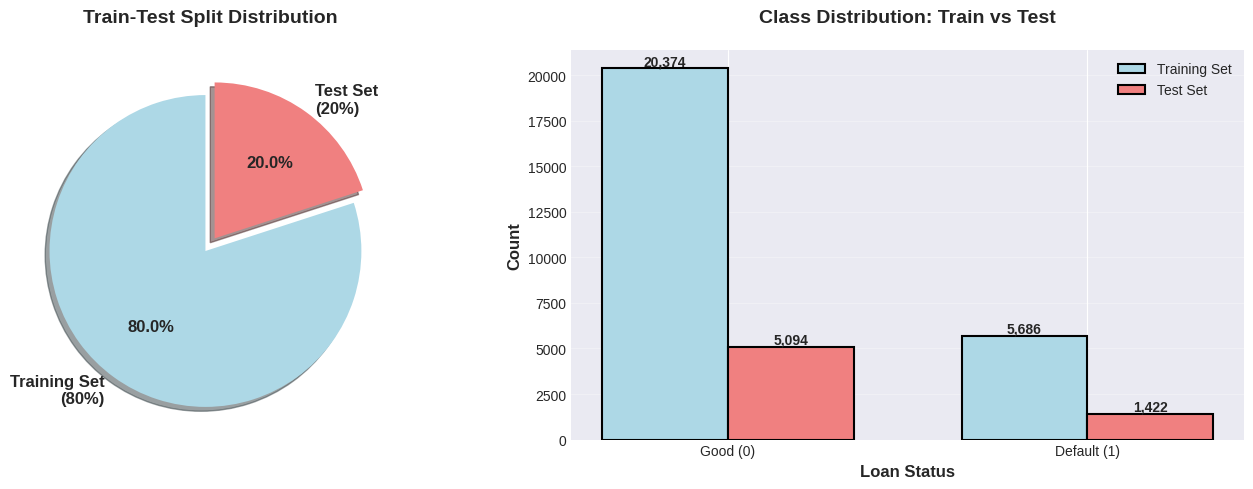


💡 Notice: Class distribution is proportionally maintained in both sets


In [20]:
# Visualize train-test split
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Dataset sizes
sizes = [len(X_train), len(X_test)]
labels = ['Training Set\n(80%)', 'Test Set\n(20%)']
colors = ['lightblue', 'lightcoral']
explode = (0.05, 0.05)

axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
           startangle=90, explode=explode, shadow=True,
           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Train-Test Split Distribution', fontsize=14, fontweight='bold', pad=20)

# Plot 2: Class distribution comparison
x_pos = np.arange(2)
width = 0.35

train_dist = y_train.value_counts().sort_index().values
test_dist = y_test.value_counts().sort_index().values

bars1 = axes[1].bar(x_pos - width/2, train_dist, width, label='Training Set',
                    color='lightblue', edgecolor='black', linewidth=1.5)
bars2 = axes[1].bar(x_pos + width/2, test_dist, width, label='Test Set',
                    color='lightcoral', edgecolor='black', linewidth=1.5)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontweight='bold', fontsize=10)

axes[1].set_xlabel('Loan Status', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Class Distribution: Train vs Test', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(['Good (0)', 'Default (1)'])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Notice: Class distribution is proportionally maintained in both sets")

---
---
# 📏 STEP 8: FEATURE SCALING
---

## Why do we need feature scaling?
Different features have different scales:
- **person_age**: 18-100
- **person_income($)**: 4,000-6,000,000
- **loan_amnt($)**: 500-35,000

## Problems without scaling:
- Features with larger scales dominate the model
- Gradient descent converges slowly
- Distance-based algorithms perform poorly

## What is Standard Scaling?
**StandardScaler** transforms features to have:
- **Mean = 0**
- **Standard Deviation = 1**

Formula: `z = (x - mean) / std`

## CRITICAL: Fit on train, transform on test!
- ✅ `scaler.fit(X_train)` - Learn scaling parameters from training data
- ✅ `scaler.transform(X_test)` - Apply same scaling to test data
- ❌ **Never** fit on test data (data leakage!)

### Before Scaling - Feature Distributions

In [21]:
# Analyze feature scales before scaling
print("Feature Statistics BEFORE Scaling:")
print("="*60)
print(X_train.describe())

Feature Statistics BEFORE Scaling:
         person_age  person_income($)  person_home_ownership  \
count  26060.000000      2.606000e+04           26060.000000   
mean      27.676477      6.583304e+04               1.676899   
std        6.153340      5.207682e+04               1.433798   
min       20.000000      4.000000e+03               0.000000   
25%       23.000000      3.856800e+04               0.000000   
50%       26.000000      5.500000e+04               3.000000   
75%       30.000000      7.910300e+04               3.000000   
max       94.000000      2.039784e+06               3.000000   

       person_emp_length   loan_intent  loan_amnt($)  loan_int_rate  \
count       26060.000000  26060.000000  26060.000000   26060.000000   
mean            4.748695      2.538757   9392.850153      10.997919   
std             3.987582      1.730753   5797.719686       3.072557   
min             0.000000      0.000000    500.000000       5.420000   
25%             2.000000      1.0

### Plot 6: Feature Scales BEFORE Scaling

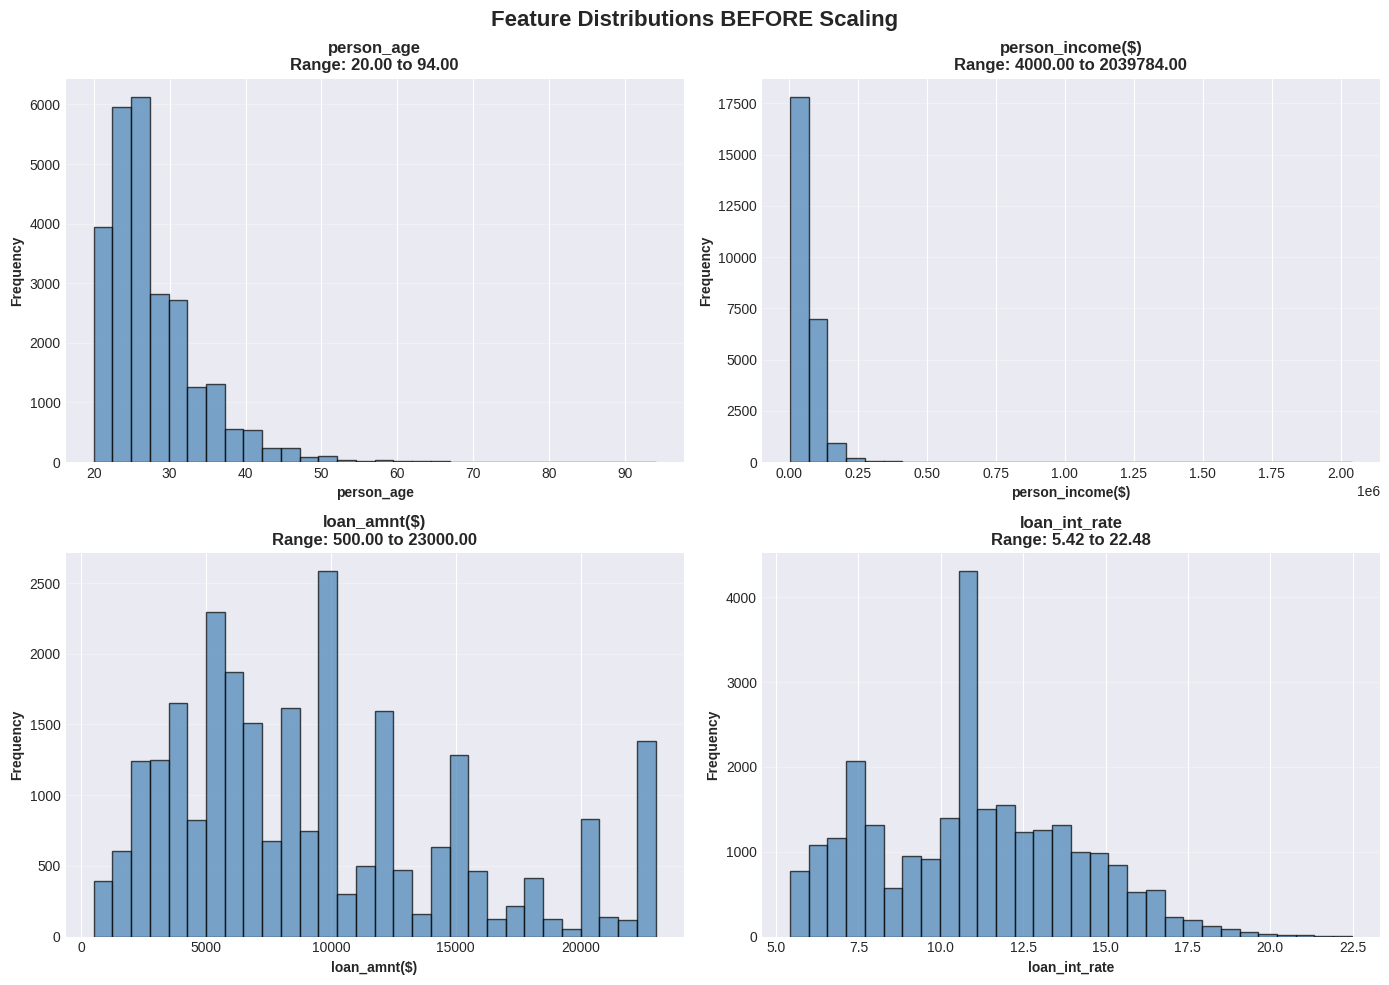


💡 Notice the different scales - some features range from 0-100, others from 0-6,000,000!


In [22]:
# Visualize feature scales before scaling
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Distributions BEFORE Scaling', fontsize=16, fontweight='bold')

# Select key numerical features to visualize
features_to_plot = ['person_age', 'person_income($)', 'loan_amnt($)', 'loan_int_rate']

for idx, feature in enumerate(features_to_plot):
    row = idx // 2
    col = idx % 2

    axes[row, col].hist(X_train[feature], bins=30, color='steelblue',
                       alpha=0.7, edgecolor='black')
    axes[row, col].set_xlabel(feature, fontweight='bold')
    axes[row, col].set_ylabel('Frequency', fontweight='bold')
    axes[row, col].set_title(f'{feature}\nRange: {X_train[feature].min():.2f} to {X_train[feature].max():.2f}',
                            fontweight='bold')
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Notice the different scales - some features range from 0-100, others from 0-6,000,000!")

### Perform Scaling

In [23]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data (using parameters from training data)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature Scaling Completed!")
print("="*60)
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape:     {X_test_scaled.shape}")

print("\n📊 Scaling Parameters (learned from training data):")
print(f"\nFeature means:")
for i, col in enumerate(X_train.columns[:5]):  # Show first 5
    print(f"  {col:30s}: {scaler.mean_[i]:.2f}")

print(f"\nFeature standard deviations:")
for i, col in enumerate(X_train.columns[:5]):  # Show first 5
    print(f"  {col:30s}: {scaler.scale_[i]:.2f}")

✅ Feature Scaling Completed!

Scaled training data shape: (26060, 10)
Scaled test data shape:     (6516, 10)

📊 Scaling Parameters (learned from training data):

Feature means:
  person_age                    : 27.68
  person_income($)              : 65833.04
  person_home_ownership         : 1.68
  person_emp_length             : 4.75
  loan_intent                   : 2.54

Feature standard deviations:
  person_age                    : 6.15
  person_income($)              : 52075.82
  person_home_ownership         : 1.43
  person_emp_length             : 3.99
  loan_intent                   : 1.73


### After Scaling - Verify Standardization

In [24]:
# Convert scaled arrays back to DataFrames for analysis
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Feature Statistics AFTER Scaling:")
print("="*60)
print("\nTraining Set:")
print(X_train_scaled_df.describe())

print("\n💡 Notice: All features now have mean ≈ 0 and std ≈ 1!")

Feature Statistics AFTER Scaling:

Training Set:
         person_age  person_income($)  person_home_ownership  \
count  2.606000e+04      2.606000e+04           2.606000e+04   
mean   2.481174e-16     -3.585432e-17          -1.090626e-18   
std    1.000019e+00      1.000019e+00           1.000019e+00   
min   -1.247554e+00     -1.187366e+00          -1.169573e+00   
25%   -7.600047e-01     -5.235642e-01          -1.169573e+00   
50%   -2.724552e-01     -2.080243e-01           9.228119e-01   
75%    3.776107e-01      2.548200e-01           9.228119e-01   
max    1.077867e+01      3.790532e+01           9.228119e-01   

       person_emp_length   loan_intent  loan_amnt($)  loan_int_rate  \
count       2.606000e+04  2.606000e+04  2.606000e+04   2.606000e+04   
mean        4.471566e-17  1.036095e-17  3.271878e-17   1.451214e-16   
std         1.000019e+00  1.000019e+00  1.000019e+00   1.000019e+00   
min        -1.190894e+00 -1.466879e+00 -1.533883e+00  -1.815434e+00   
25%        -6.89327

### Plot 7: Feature Scales AFTER Scaling

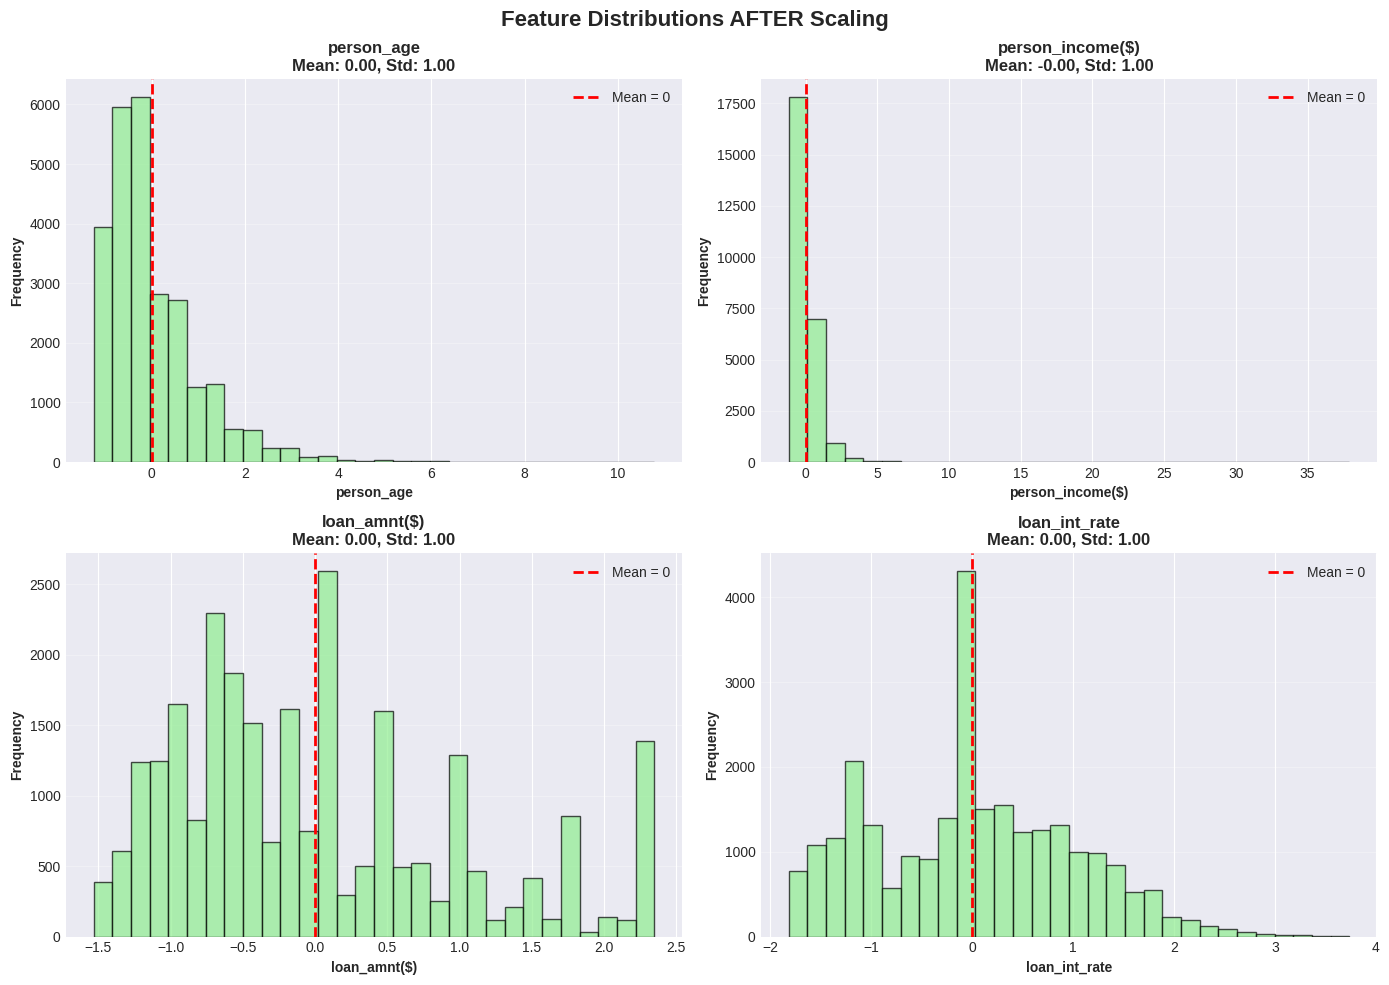


✅ All features are now on the same scale (mean=0, std=1)!
✅ This ensures no single feature dominates the model!


In [25]:
# Visualize feature scales after scaling
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Distributions AFTER Scaling', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features_to_plot):
    row = idx // 2
    col = idx % 2

    axes[row, col].hist(X_train_scaled_df[feature], bins=30, color='lightgreen',
                       alpha=0.7, edgecolor='black')
    axes[row, col].axvline(0, color='red', linestyle='--', linewidth=2, label='Mean = 0')
    axes[row, col].set_xlabel(feature, fontweight='bold')
    axes[row, col].set_ylabel('Frequency', fontweight='bold')
    axes[row, col].set_title(f'{feature}\nMean: {X_train_scaled_df[feature].mean():.2f}, Std: {X_train_scaled_df[feature].std():.2f}',
                            fontweight='bold')
    axes[row, col].legend()
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ All features are now on the same scale (mean=0, std=1)!")
print("✅ This ensures no single feature dominates the model!")

### Plot 8: BEFORE vs AFTER Scaling Comparison

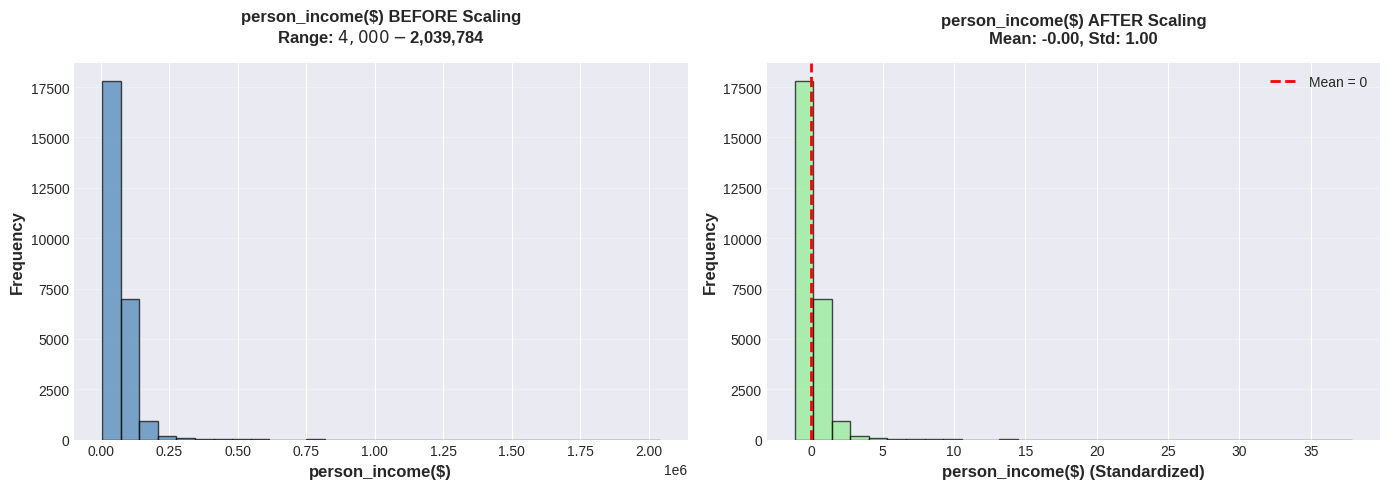


💡 Same shape, different scale - the distribution pattern is preserved!


In [27]:
# Compare before and after scaling for one feature
feature = 'person_income($)'

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].hist(X_train[feature], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel(feature, fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title(f'{feature} BEFORE Scaling\nRange: ${X_train[feature].min():,.0f} - ${X_train[feature].max():,.0f}',
                 fontsize=12, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

# After scaling
axes[1].hist(X_train_scaled_df[feature], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Mean = 0')
axes[1].set_xlabel(f'{feature} (Standardized)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title(f'{feature} AFTER Scaling\nMean: {X_train_scaled_df[feature].mean():.2f}, Std: {X_train_scaled_df[feature].std():.2f}',
                 fontsize=12, fontweight='bold', pad=15)
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Same shape, different scale - the distribution pattern is preserved!")

---
---
# 🤖 STEP 9: TRAIN MACHINE LEARNING MODELS
---

We'll train **two different models** and compare their performance:

## Model 1: Logistic Regression
- **Type**: Linear classifier
- **Best for**: Linearly separable data
- **Pros**: Fast, interpretable, probabilistic output
- **Cons**: Assumes linear relationships

## Model 2: Decision Tree
- **Type**: Tree-based classifier
- **Best for**: Non-linear relationships, feature interactions
- **Pros**: Handles non-linearity, easy to visualize
- **Cons**: Can overfit, sensitive to small changes

---
## MODEL 1: LOGISTIC REGRESSION
---

### What is Logistic Regression?
- Predicts probability that a sample belongs to a class
- Uses **sigmoid function** to map predictions to [0, 1]
- Decision boundary: If P(y=1) > 0.5, predict 1, else predict 0

### Hyperparameters:
- **max_iter=1000**: Maximum iterations for convergence

In [28]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(
    max_iter=1000,  # Increase iterations for convergence
    random_state=42 # For reproducibility
)

print("Training Logistic Regression Model...")
print("="*60)

# Train the model
lr_model.fit(X_train_scaled, y_train)

print("✅ Logistic Regression training completed!")
print(f"\nModel Parameters:")
print(f"  Number of features: {lr_model.n_features_in_}")
print(f"  Number of iterations: {lr_model.n_iter_[0]}")
print(f"  Classes: {lr_model.classes_}")

Training Logistic Regression Model...
✅ Logistic Regression training completed!

Model Parameters:
  Number of features: 10
  Number of iterations: 15
  Classes: [0 1]


### Make Predictions with Logistic Regression

In [29]:
# Generate predictions
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# FIX 2: Use threshold 0.35 instead of default 0.50.
# The default 0.50 causes the model to miss ~34% of real defaulters.
# Lowering to 0.35 trades a small drop in precision for a large gain in recall,
# which matters more in a credit-risk context (false negatives = real financial loss).
LR_THRESHOLD = 0.35
lr_pred = (lr_prob >= LR_THRESHOLD).astype(int)

print("✅ Predictions generated!")
print(f"\nPredictions shape: {lr_pred.shape}")
print(f"Probabilities shape: {lr_prob.shape}")

print(f"\nFirst 10 predictions:")
print(f"Actual:      {y_test.values[:10]}")
print(f"Predicted:   {lr_pred[:10]}")
print(f"Probability: {lr_prob[:10].round(3)}")

✅ Predictions generated!

Predictions shape: (6516,)
Probabilities shape: (6516,)

First 10 predictions:
Actual:      [0 0 0 0 0 0 1 0 0 0]
Predicted:   [0 0 0 0 0 0 1 0 0 0]
Probability: [0.264 0.008 0.082 0.014 0.038 0.14  0.497 0.139 0.145 0.13 ]


---
## MODEL 2: DECISION TREE
---

### What is a Decision Tree?
- Makes decisions by asking yes/no questions about features
- Splits data recursively based on feature values
- Each leaf node represents a class prediction

### Hyperparameters:
- **max_depth=10**: Maximum depth of the tree (prevents overfitting)
- Deeper trees can overfit, shallower trees might underfit

In [30]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(
    max_depth=10,   # Limit tree depth to prevent overfitting
    random_state=42 # For reproducibility
)

print("Training Decision Tree Model...")
print("="*60)

# Train the model
dt_model.fit(X_train_scaled, y_train)

print("✅ Decision Tree training completed!")
print(f"\nModel Parameters:")
print(f"  Number of features: {dt_model.n_features_in_}")
print(f"  Tree depth: {dt_model.get_depth()}")
print(f"  Number of leaves: {dt_model.get_n_leaves()}")
print(f"  Classes: {dt_model.classes_}")

Training Decision Tree Model...
✅ Decision Tree training completed!

Model Parameters:
  Number of features: 10
  Tree depth: 10
  Number of leaves: 264
  Classes: [0 1]


### Make Predictions with Decision Tree

In [31]:
# Generate predictions
dt_prob = dt_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# FIX 4: Use threshold 0.35 instead of default 0.50 (same reasoning as LR fix above).
DT_THRESHOLD = 0.35
dt_pred = (dt_prob >= DT_THRESHOLD).astype(int)

print("✅ Predictions generated!")
print(f"\nPredictions shape: {dt_pred.shape}")
print(f"Probabilities shape: {dt_prob.shape}")

print(f"\nFirst 10 predictions:")
print(f"Actual:      {y_test.values[:10]}")
print(f"Predicted:   {dt_pred[:10]}")
print(f"Probability: {dt_prob[:10].round(3)}")

✅ Predictions generated!

Predictions shape: (6516,)
Probabilities shape: (6516,)

First 10 predictions:
Actual:      [0 0 0 0 0 0 1 0 0 0]
Predicted:   [0 0 0 0 0 0 1 0 0 0]
Probability: [0.031 0.    0.056 0.012 0.    0.071 1.    0.071 0.071 0.019]


### Plot 9: Feature Importance (Decision Tree)

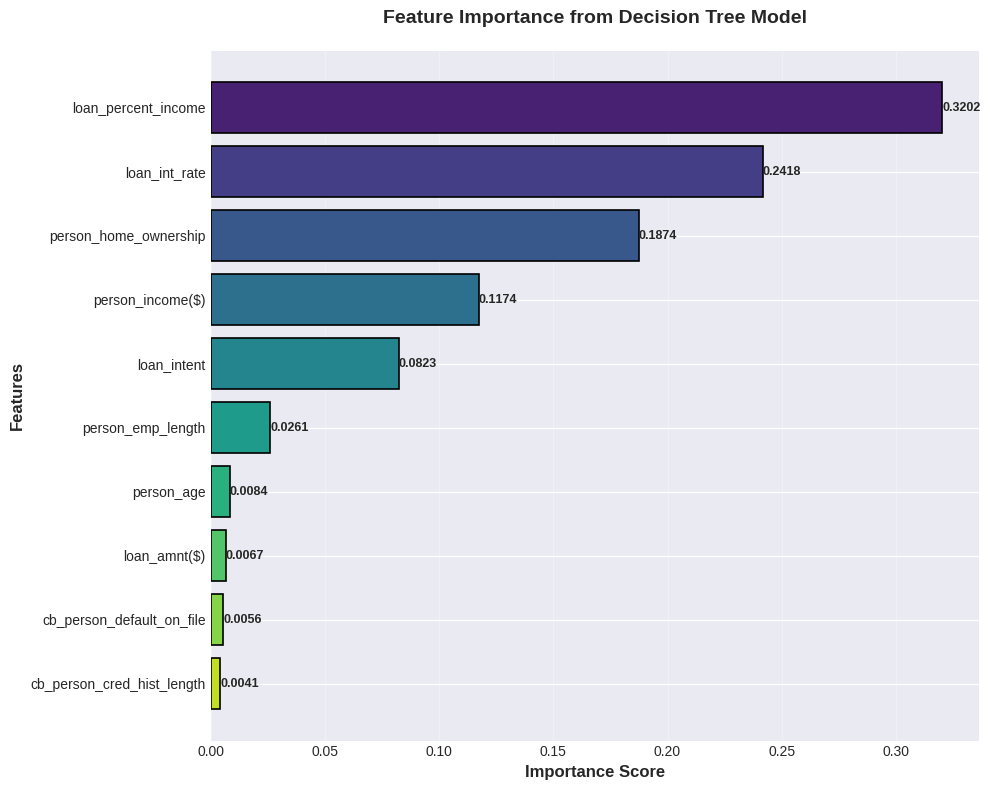


Top 5 Most Important Features:
loan_percent_income           : 0.3202
loan_int_rate                 : 0.2418
person_home_ownership         : 0.1874
person_income($)              : 0.1174
loan_intent                   : 0.0823


In [32]:
# Visualize feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
colors = sns.color_palette('viridis', len(feature_importance))
bars = plt.barh(feature_importance['feature'], feature_importance['importance'],
                color=colors, edgecolor='black', linewidth=1.2)

plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance from Decision Tree Model', fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, feature_importance['importance'])):
    plt.text(value, bar.get_y() + bar.get_height()/2, f'{value:.4f}',
            va='center', ha='left', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print("="*60)
for idx, row in feature_importance.head().iterrows():
    print(f"{row['feature']:30s}: {row['importance']:.4f}")

---
---
# 📊 STEP 10: MODEL EVALUATION - BASIC METRICS
---

## Evaluation Metrics:

### 1. Accuracy
- **Definition**: Percentage of correct predictions
- **Formula**: (TP + TN) / Total
- **When to use**: Balanced datasets

### 2. Precision
- **Definition**: Of all predicted positives, how many are actually positive?
- **Formula**: TP / (TP + FP)
- **When important**: When false positives are costly

### 3. Recall (Sensitivity)
- **Definition**: Of all actual positives, how many did we catch?
- **Formula**: TP / (TP + FN)
- **When important**: When false negatives are costly

### 4. F1-Score
- **Definition**: Harmonic mean of precision and recall
- **Formula**: 2 × (Precision × Recall) / (Precision + Recall)
- **When to use**: Balance between precision and recall

---
## LOGISTIC REGRESSION EVALUATION
---

In [33]:
print("="*80)
print("LOGISTIC REGRESSION - MODEL EVALUATION")
print("="*80)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"\n✅ Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")

# Detailed classification report
print("\n📊 Detailed Classification Report:")
print("="*80)
print(classification_report(y_test, lr_pred, target_names=['Good Loan (0)', 'Default (1)']))

print("\n💡 Interpretation:")
print("  - Precision: Of loans predicted to default, what % actually defaulted?")
print("  - Recall: Of loans that actually defaulted, what % did we catch?")
print("  - F1-Score: Balance between precision and recall")

LOGISTIC REGRESSION - MODEL EVALUATION

✅ Accuracy: 0.8201 (82.01%)

📊 Detailed Classification Report:
               precision    recall  f1-score   support

Good Loan (0)       0.89      0.88      0.88      5094
  Default (1)       0.58      0.62      0.60      1422

     accuracy                           0.82      6516
    macro avg       0.74      0.75      0.74      6516
 weighted avg       0.82      0.82      0.82      6516


💡 Interpretation:
  - Precision: Of loans predicted to default, what % actually defaulted?
  - Recall: Of loans that actually defaulted, what % did we catch?
  - F1-Score: Balance between precision and recall


---
## DECISION TREE EVALUATION
---

In [34]:
print("="*80)
print("DECISION TREE - MODEL EVALUATION")
print("="*80)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"\n✅ Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")

# Detailed classification report
print("\n📊 Detailed Classification Report:")
print("="*80)
print(classification_report(y_test, dt_pred, target_names=['Good Loan (0)', 'Default (1)']))

DECISION TREE - MODEL EVALUATION

✅ Accuracy: 0.9081 (90.81%)

📊 Detailed Classification Report:
               precision    recall  f1-score   support

Good Loan (0)       0.92      0.97      0.94      5094
  Default (1)       0.87      0.68      0.76      1422

     accuracy                           0.91      6516
    macro avg       0.89      0.83      0.85      6516
 weighted avg       0.91      0.91      0.90      6516



---
---
# 📈 STEP 11: ADVANCED METRICS - ROC-AUC SCORE
---

## What is ROC-AUC?

### ROC Curve (Receiver Operating Characteristic)
- Plots **True Positive Rate** (Recall) vs **False Positive Rate**
- Shows trade-off between sensitivity and specificity
- Each point represents a different classification threshold

### AUC (Area Under Curve)
- Measures the entire 2D area under ROC curve
- **Range**: 0 to 1
- **Interpretation**:
  - 1.0 = Perfect classifier
  - 0.5 = Random guessing
  - < 0.5 = Worse than random

### Why is ROC-AUC important?
- **Threshold-independent**: Evaluates all possible thresholds
- **Balanced metric**: Works well with imbalanced datasets
- **Probability-based**: Uses predicted probabilities, not just labels

In [35]:
# Calculate ROC-AUC scores
lr_roc_auc = roc_auc_score(y_test, lr_prob)
dt_roc_auc = roc_auc_score(y_test, dt_prob)

print("="*80)
print("ROC-AUC SCORE COMPARISON")
print("="*80)

print(f"\n📊 Logistic Regression:")
print(f"   Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"   ROC-AUC:   {lr_roc_auc:.4f}")

print(f"\n📊 Decision Tree:")
print(f"   Accuracy:  {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"   ROC-AUC:   {dt_roc_auc:.4f}")

print(f"\n" + "="*80)
if lr_roc_auc > dt_roc_auc:
    print(f"🏆 Logistic Regression has better ROC-AUC score!")
    print(f"   Difference: {(lr_roc_auc - dt_roc_auc):.4f}")
else:
    print(f"🏆 Decision Tree has better ROC-AUC score!")
    print(f"   Difference: {(dt_roc_auc - lr_roc_auc):.4f}")

ROC-AUC SCORE COMPARISON

📊 Logistic Regression:
   Accuracy:  0.8201 (82.01%)
   ROC-AUC:   0.8336

📊 Decision Tree:
   Accuracy:  0.9081 (90.81%)
   ROC-AUC:   0.8908

🏆 Decision Tree has better ROC-AUC score!
   Difference: 0.0572


---
---
# 🎨 STEP 12: CONFUSION MATRICES
---

## What is a Confusion Matrix?
A table showing the performance of a classifier:

```
                    Predicted
                 Good  |  Default
         Good    TN   |   FP
Actual   
         Default FN   |   TP
```

- **TN (True Negative)**: Correctly predicted good loans
- **FP (False Positive)**: Good loans predicted as defaults
- **FN (False Negative)**: Defaults predicted as good loans ⚠️ COSTLY!
- **TP (True Positive)**: Correctly predicted defaults

## Why is it important?
- Shows **types of errors** the model makes
- In credit risk, **FN (missing defaults) is very costly!**
- Helps understand model behavior beyond just accuracy

### Plot 10: Logistic Regression Confusion Matrix

<Figure size 800x600 with 0 Axes>

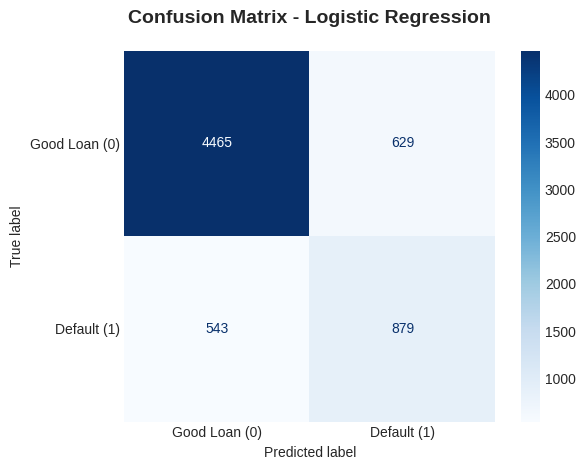


📊 Logistic Regression Confusion Matrix Breakdown:
True Negatives (TN):  4,465  - Correctly predicted good loans
False Positives (FP): 629  - Good loans wrongly predicted as defaults
False Negatives (FN): 543  - Defaults wrongly predicted as good loans ⚠️
True Positives (TP):  879  - Correctly predicted defaults

💰 Business Impact:
   False Negatives are MOST COSTLY - we missed 543 defaults!
   False Positives - we rejected 629 good customers


In [36]:
# Confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, lr_pred,
    display_labels=['Good Loan (0)', 'Default (1)'],
    cmap='Blues',
    values_format='d'
)
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold', pad=20)
plt.grid(False)
plt.tight_layout()
plt.show()

# Calculate and display confusion matrix values
lr_cm = confusion_matrix(y_test, lr_pred)
tn, fp, fn, tp = lr_cm.ravel()

print("\n📊 Logistic Regression Confusion Matrix Breakdown:")
print("="*60)
print(f"True Negatives (TN):  {tn:,}  - Correctly predicted good loans")
print(f"False Positives (FP): {fp:,}  - Good loans wrongly predicted as defaults")
print(f"False Negatives (FN): {fn:,}  - Defaults wrongly predicted as good loans ⚠️")
print(f"True Positives (TP):  {tp:,}  - Correctly predicted defaults")

print(f"\n💰 Business Impact:")
print(f"   False Negatives are MOST COSTLY - we missed {fn} defaults!")
print(f"   False Positives - we rejected {fp} good customers")

### Plot 11: Decision Tree Confusion Matrix

<Figure size 800x600 with 0 Axes>

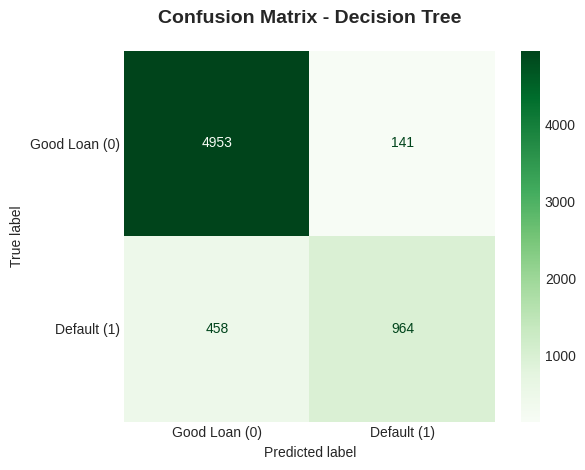


📊 Decision Tree Confusion Matrix Breakdown:
True Negatives (TN):  4,953  - Correctly predicted good loans
False Positives (FP): 141  - Good loans wrongly predicted as defaults
False Negatives (FN): 458  - Defaults wrongly predicted as good loans ⚠️
True Positives (TP):  964  - Correctly predicted defaults

💰 Business Impact:
   False Negatives are MOST COSTLY - we missed 458 defaults!
   False Positives - we rejected 141 good customers


In [37]:
# Confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, dt_pred,
    display_labels=['Good Loan (0)', 'Default (1)'],
    cmap='Greens',
    values_format='d'
)
plt.title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold', pad=20)
plt.grid(False)
plt.tight_layout()
plt.show()

# Calculate and display confusion matrix values
dt_cm = confusion_matrix(y_test, dt_pred)
tn, fp, fn, tp = dt_cm.ravel()

print("\n📊 Decision Tree Confusion Matrix Breakdown:")
print("="*60)
print(f"True Negatives (TN):  {tn:,}  - Correctly predicted good loans")
print(f"False Positives (FP): {fp:,}  - Good loans wrongly predicted as defaults")
print(f"False Negatives (FN): {fn:,}  - Defaults wrongly predicted as good loans ⚠️")
print(f"True Positives (TP):  {tp:,}  - Correctly predicted defaults")

print(f"\n💰 Business Impact:")
print(f"   False Negatives are MOST COSTLY - we missed {fn} defaults!")
print(f"   False Positives - we rejected {fp} good customers")

---
---
# 📉 STEP 13: ROC CURVES VISUALIZATION
---

## Understanding ROC Curves:

- **X-axis**: False Positive Rate (FPR) = FP / (FP + TN)
- **Y-axis**: True Positive Rate (TPR) = TP / (TP + FN)
- **Diagonal line**: Random classifier (AUC = 0.5)
- **Perfect classifier**: Line going through (0,1) point (AUC = 1.0)
- **Better model**: Curve closer to top-left corner

### Plot 12: Logistic Regression ROC Curve

<Figure size 1000x800 with 0 Axes>

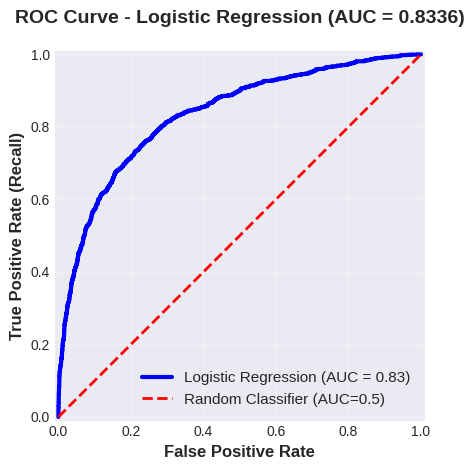


📊 Logistic Regression ROC-AUC: 0.8336

💡 Interpretation: The model can distinguish between classes 83.36% of the time


In [38]:
# ROC curve for Logistic Regression
plt.figure(figsize=(10, 8))
RocCurveDisplay.from_estimator(
    lr_model,
    X_test_scaled,
    y_test,
    name='Logistic Regression',
    color='blue',
    linewidth=3
)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier (AUC=0.5)')
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Recall)', fontsize=12, fontweight='bold')
plt.title(f'ROC Curve - Logistic Regression (AUC = {lr_roc_auc:.4f})',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Logistic Regression ROC-AUC: {lr_roc_auc:.4f}")
print(f"\n💡 Interpretation: The model can distinguish between classes {lr_roc_auc*100:.2f}% of the time")

### Plot 13: Decision Tree ROC Curve

<Figure size 1000x800 with 0 Axes>

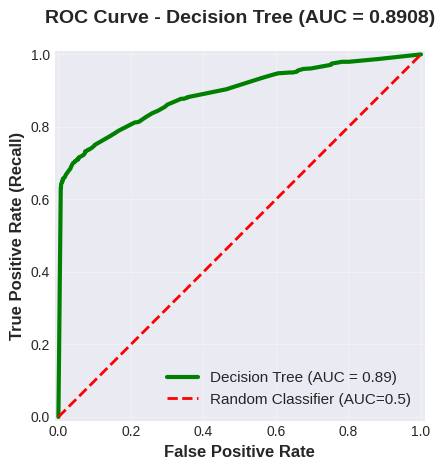


📊 Decision Tree ROC-AUC: 0.8908

💡 Interpretation: The model can distinguish between classes 89.08% of the time


In [39]:
# ROC curve for Decision Tree
plt.figure(figsize=(10, 8))
RocCurveDisplay.from_estimator(
    dt_model,
    X_test_scaled,
    y_test,
    name='Decision Tree',
    color='green',
    linewidth=3
)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier (AUC=0.5)')
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Recall)', fontsize=12, fontweight='bold')
plt.title(f'ROC Curve - Decision Tree (AUC = {dt_roc_auc:.4f})',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Decision Tree ROC-AUC: {dt_roc_auc:.4f}")
print(f"\n💡 Interpretation: The model can distinguish between classes {dt_roc_auc*100:.2f}% of the time")

### Plot 14: ROC Curves Comparison

<Figure size 1000x800 with 0 Axes>

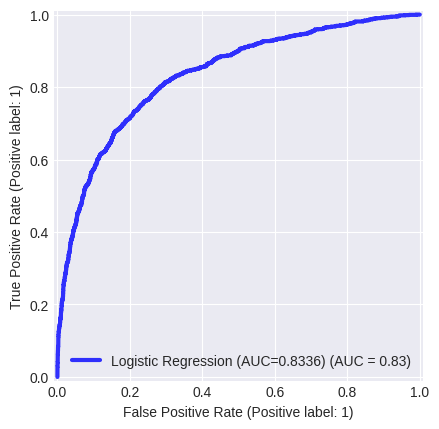

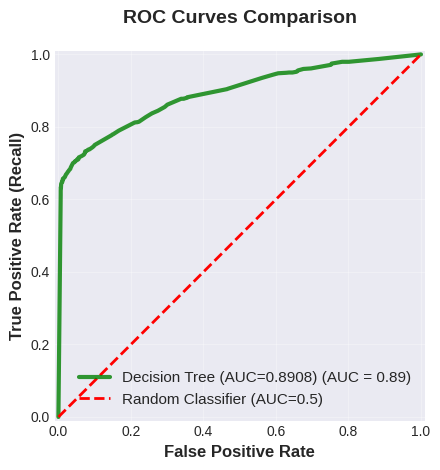


ROC CURVE COMPARISON

Logistic Regression AUC: 0.8336
Decision Tree AUC:       0.8908

Difference:              0.0572

🏆 Winner: Decision Tree has better discrimination ability!


In [40]:
# Compare both ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression
RocCurveDisplay.from_estimator(
    lr_model, X_test_scaled, y_test,
    name=f'Logistic Regression (AUC={lr_roc_auc:.4f})',
    color='blue', linewidth=3, alpha=0.8
)

# Decision Tree
RocCurveDisplay.from_estimator(
    dt_model, X_test_scaled, y_test,
    name=f'Decision Tree (AUC={dt_roc_auc:.4f})',
    color='green', linewidth=3, alpha=0.8
)

# Random classifier
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier (AUC=0.5)')

plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Recall)', fontsize=12, fontweight='bold')
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ROC CURVE COMPARISON")
print("="*80)
print(f"\nLogistic Regression AUC: {lr_roc_auc:.4f}")
print(f"Decision Tree AUC:       {dt_roc_auc:.4f}")
print(f"\nDifference:              {abs(lr_roc_auc - dt_roc_auc):.4f}")

if lr_roc_auc > dt_roc_auc:
    print(f"\n🏆 Winner: Logistic Regression has better discrimination ability!")
else:
    print(f"\n🏆 Winner: Decision Tree has better discrimination ability!")

---
---
# 🔍 STEP 14: CHECK FOR OVERFITTING
---

## What is Overfitting?
- Model performs **very well** on training data
- But performs **poorly** on test/unseen data
- Model has "memorized" training data instead of learning patterns

## How to detect overfitting?
Compare training and test accuracy:
- **Small gap** (< 5%): Good generalization ✅
- **Large gap** (> 10%): Overfitting ⚠️
- **Test > Train**: Underfitting or lucky split

## Why check Decision Tree specifically?
Decision Trees are **prone to overfitting** because:
- Can create very complex decision boundaries
- Can fit noise in the training data
- That's why we used `max_depth=10` to limit complexity

In [41]:
# Check for overfitting in Decision Tree
dt_train_pred = dt_model.predict(X_train_scaled)
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
dt_test_accuracy = accuracy_score(y_test, dt_pred)

print("="*80)
print("OVERFITTING CHECK - DECISION TREE")
print("="*80)

print(f"\n📊 Training Accuracy:  {dt_train_accuracy:.4f} ({dt_train_accuracy*100:.2f}%)")
print(f"📊 Test Accuracy:      {dt_test_accuracy:.4f} ({dt_test_accuracy*100:.2f}%)")
print(f"\n📉 Accuracy Gap:       {abs(dt_train_accuracy - dt_test_accuracy):.4f} ({abs(dt_train_accuracy - dt_test_accuracy)*100:.2f}%)")

gap_percentage = abs(dt_train_accuracy - dt_test_accuracy) * 100

if gap_percentage < 2:
    print("\n✅ EXCELLENT: Model generalizes very well!")
elif gap_percentage < 5:
    print("\n✅ GOOD: Model generalizes well with minimal overfitting")
elif gap_percentage < 10:
    print("\n⚠️  MODERATE: Some overfitting detected, consider regularization")
else:
    print("\n❌ HIGH OVERFITTING: Model is memorizing training data!")
    print("   Recommendations:")
    print("   - Reduce max_depth")
    print("   - Increase min_samples_split")
    print("   - Use ensemble methods (Random Forest, XGBoost)")

OVERFITTING CHECK - DECISION TREE

📊 Training Accuracy:  0.9288 (92.88%)
📊 Test Accuracy:      0.9081 (90.81%)

📉 Accuracy Gap:       0.0207 (2.07%)

✅ GOOD: Model generalizes well with minimal overfitting


### Plot 15: Training vs Test Accuracy Comparison

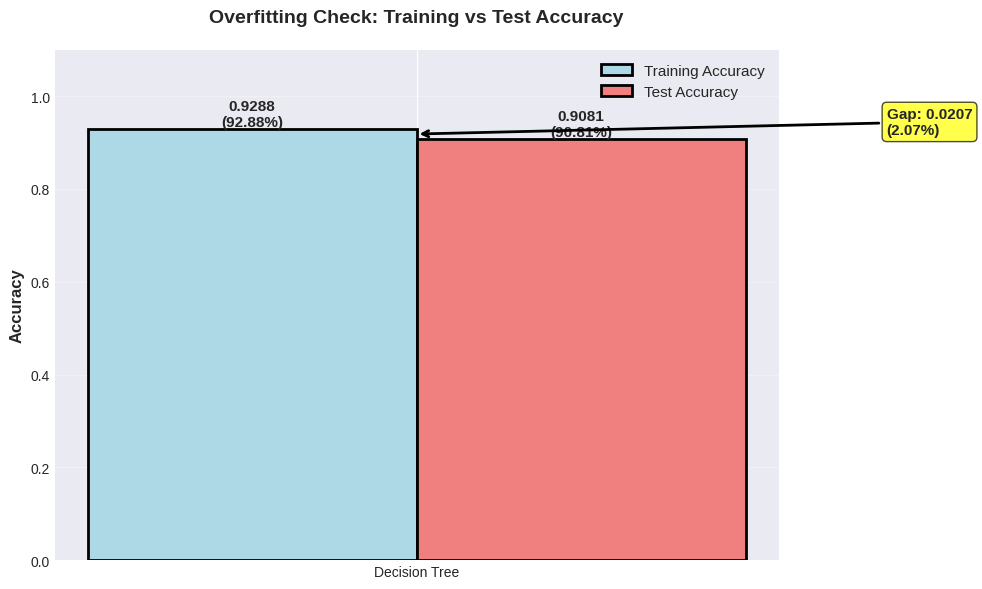

In [42]:
# Visualize overfitting check
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Decision Tree']
x_pos = np.arange(len(models))
width = 0.35

train_acc = [dt_train_accuracy]
test_acc = [dt_test_accuracy]

bars1 = ax.bar(x_pos - width/2, train_acc, width, label='Training Accuracy',
              color='lightblue', edgecolor='black', linewidth=2)
bars2 = ax.bar(x_pos + width/2, test_acc, width, label='Test Accuracy',
              color='lightcoral', edgecolor='black', linewidth=2)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.4f}\n({height*100:.2f}%)',
               ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Overfitting Check: Training vs Test Accuracy', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Add gap annotation
gap = abs(dt_train_accuracy - dt_test_accuracy)
ax.annotate(f'Gap: {gap:.4f}\n({gap*100:.2f}%)',
           xy=(0, (dt_train_accuracy + dt_test_accuracy)/2),
           xytext=(0.5, (dt_train_accuracy + dt_test_accuracy)/2),
           fontsize=11, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
           arrowprops=dict(arrowstyle='->', lw=2))

plt.tight_layout()
plt.show()

---
---
# 📊 STEP 15: FINAL MODEL COMPARISON
---

In [43]:
# Create comprehensive comparison
print("\n" + "="*80)
print("FINAL MODEL COMPARISON SUMMARY")
print("="*80)

comparison_data = {
    'Metric': [
        'Test Accuracy',
        'ROC-AUC Score',
        'Training Accuracy',
        'Overfitting Gap'
    ],
    'Logistic Regression': [
        f"{lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)",
        f"{lr_roc_auc:.4f}",
        'N/A',
        'N/A'
    ],
    'Decision Tree': [
        f"{dt_test_accuracy:.4f} ({dt_test_accuracy*100:.2f}%)",
        f"{dt_roc_auc:.4f}",
        f"{dt_train_accuracy:.4f} ({dt_train_accuracy*100:.2f}%)",
        f"{abs(dt_train_accuracy - dt_test_accuracy):.4f} ({abs(dt_train_accuracy - dt_test_accuracy)*100:.2f}%)"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

print("\n" + "="*80)
print("RECOMMENDATION")
print("="*80)

if dt_roc_auc > lr_roc_auc and gap_percentage < 10:
    print("\n🏆 WINNER: Decision Tree")
    print("   Reasons:")
    print(f"   ✓ Higher ROC-AUC score ({dt_roc_auc:.4f} vs {lr_roc_auc:.4f})")
    print(f"   ✓ Acceptable overfitting gap ({gap_percentage:.2f}%)")
    print(f"   ✓ Better at capturing non-linear relationships")
else:
    print("\n🏆 WINNER: Logistic Regression")
    print("   Reasons:")
    if lr_roc_auc > dt_roc_auc:
        print(f"   ✓ Higher ROC-AUC score ({lr_roc_auc:.4f} vs {dt_roc_auc:.4f})")
    print(f"   ✓ More stable and generalizable")
    print(f"   ✓ Less prone to overfitting")
    print(f"   ✓ Easier to interpret coefficients")


FINAL MODEL COMPARISON SUMMARY

           Metric Logistic Regression   Decision Tree
    Test Accuracy     0.8201 (82.01%) 0.9081 (90.81%)
    ROC-AUC Score              0.8336          0.8908
Training Accuracy                 N/A 0.9288 (92.88%)
  Overfitting Gap                 N/A  0.0207 (2.07%)

RECOMMENDATION

🏆 WINNER: Decision Tree
   Reasons:
   ✓ Higher ROC-AUC score (0.8908 vs 0.8336)
   ✓ Acceptable overfitting gap (2.07%)
   ✓ Better at capturing non-linear relationships


### Plot 16: Model Comparison Dashboard

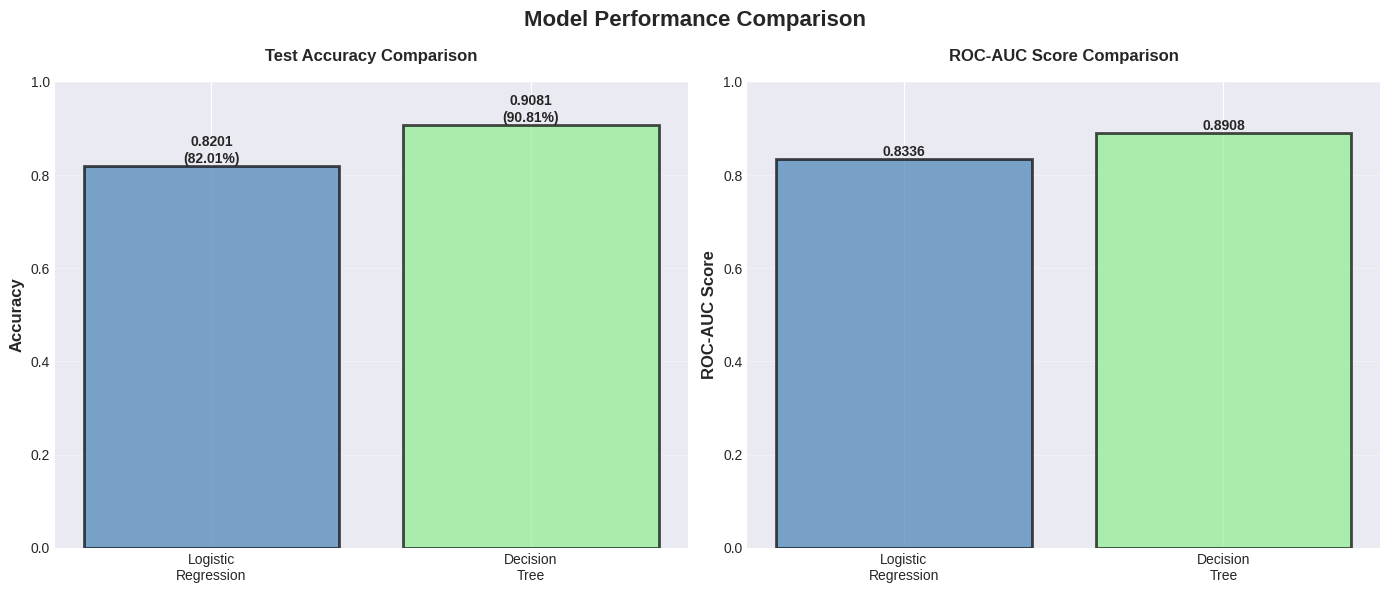

In [44]:
# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Plot 1: Accuracy Comparison
models = ['Logistic\nRegression', 'Decision\nTree']
accuracies = [lr_accuracy, dt_test_accuracy]
colors = ['steelblue', 'lightgreen']

bars1 = axes[0].bar(models, accuracies, color=colors, edgecolor='black', linewidth=2, alpha=0.7)
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Test Accuracy Comparison', fontsize=12, fontweight='bold', pad=15)
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bar, acc in zip(bars1, accuracies):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.4f}\n({acc*100:.2f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

# Plot 2: ROC-AUC Comparison
roc_scores = [lr_roc_auc, dt_roc_auc]
bars2 = axes[1].bar(models, roc_scores, color=colors, edgecolor='black', linewidth=2, alpha=0.7)
axes[1].set_ylabel('ROC-AUC Score', fontsize=12, fontweight='bold')
axes[1].set_title('ROC-AUC Score Comparison', fontsize=12, fontweight='bold', pad=15)
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar, roc in zip(bars2, roc_scores):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{roc:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

---
---
# 💾 STEP 16: SAVE THE MODEL FOR DEPLOYMENT
---

## What are we saving?
A complete **model package** that includes:
1. **Trained model**: The Decision Tree classifier
2. **Scaler**: StandardScaler (to transform new data)
3. **Encoders**: LabelEncoders for categorical variables
4. **Feature columns**: Order of features (important!)

## Why save all of these?
When making predictions on new data, we need to:
1. Encode categorical variables (same mapping)
2. Scale features (same parameters)
3. Use features in the same order

## Why use pickle?
- **Pickle** serializes Python objects
- Saves the complete state of the model
- Can be loaded and used anywhere

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# ── Decision Tree metrics ──────────────────────────────────────────────────
dt_report_dict = classification_report(
    y_test, dt_pred,
    target_names=['Good Loan (0)', 'Default (1)'],
    output_dict=True
)
dt_cm = confusion_matrix(y_test, dt_pred).tolist()
dt_precision_0 = dt_report_dict['Good Loan (0)']['precision']
dt_recall_0    = dt_report_dict['Good Loan (0)']['recall']
dt_f1_0        = dt_report_dict['Good Loan (0)']['f1-score']
dt_precision_1 = dt_report_dict['Default (1)']['precision']
dt_recall_1    = dt_report_dict['Default (1)']['recall']
dt_f1_1        = dt_report_dict['Default (1)']['f1-score']
feature_importance_dict = dict(zip(X.columns.tolist(), dt_model.feature_importances_.tolist()))

# ── Logistic Regression metrics ────────────────────────────────────────────
lr_report_dict = classification_report(
    y_test, lr_pred,
    target_names=['Good Loan (0)', 'Default (1)'],
    output_dict=True
)
lr_cm = confusion_matrix(y_test, lr_pred).tolist()
lr_precision_0 = lr_report_dict['Good Loan (0)']['precision']
lr_recall_0    = lr_report_dict['Good Loan (0)']['recall']
lr_f1_0        = lr_report_dict['Good Loan (0)']['f1-score']
lr_precision_1 = lr_report_dict['Default (1)']['precision']
lr_recall_1    = lr_report_dict['Default (1)']['recall']
lr_f1_1        = lr_report_dict['Default (1)']['f1-score']

# LR feature coefficients (useful for UI display)
lr_coef_dict = dict(zip(X.columns.tolist(), lr_model.coef_[0].tolist()))

# ── Build model package ────────────────────────────────────────────────────
model_package = {
    # ── Core inference (Decision Tree — primary model) ──
    'model':              dt_model,
    'scaler':             scaler,
    'encoders':           encoders,
    'feature_columns':    X.columns.tolist(),
    'dt_threshold':       DT_THRESHOLD,   # FIX 5: export threshold so Streamlit
                                          #        uses same cut-off as training
    # ── Secondary model (Logistic Regression) ──────────
    'lr_model':           lr_model,        # FIX 5b: export LR model for comparison
    'lr_threshold':       LR_THRESHOLD,

    # ── Dataset info ────────────────────────────────────
    'dataset_info': {
        'total_samples':  len(X),
        'train_samples':  len(X_train),
        'test_samples':   len(X_test),
        'n_features':     len(X.columns),
        'class_labels':   ['Good Loan (0)', 'Default (1)'],
    },

    # ── Decision Tree metrics ────────────────────────────
    'dt_metrics': {
        'model_name':             'Decision Tree',
        'train_accuracy':         float(dt_train_accuracy),
        'test_accuracy':          float(dt_test_accuracy),
        'roc_auc':                float(dt_roc_auc),
        'overfit_gap':            float(abs(dt_train_accuracy - dt_test_accuracy)),
        'threshold':              DT_THRESHOLD,
        'confusion_matrix':       dt_cm,
        'feature_importance':     feature_importance_dict,
        'classification_report':  dt_report_dict,
        'class_metrics': {
            'Good Loan (0)': {
                'precision': float(dt_precision_0), 'recall': float(dt_recall_0),
                'f1_score':  float(dt_f1_0),
                'support':   int(dt_report_dict['Good Loan (0)']['support']),
            },
            'Default (1)': {
                'precision': float(dt_precision_1), 'recall': float(dt_recall_1),
                'f1_score':  float(dt_f1_1),
                'support':   int(dt_report_dict['Default (1)']['support']),
            },
        },
        'macro_avg': {
            'precision': float(dt_report_dict['macro avg']['precision']),
            'recall':    float(dt_report_dict['macro avg']['recall']),
            'f1_score':  float(dt_report_dict['macro avg']['f1-score']),
        },
        'weighted_avg': {
            'precision': float(dt_report_dict['weighted avg']['precision']),
            'recall':    float(dt_report_dict['weighted avg']['recall']),
            'f1_score':  float(dt_report_dict['weighted avg']['f1-score']),
        },
    },

    # ── Logistic Regression metrics ──────────────────────
    'lr_metrics': {
        'model_name':             'Logistic Regression',
        'test_accuracy':          float(lr_accuracy),
        'roc_auc':                float(lr_roc_auc),
        'threshold':              LR_THRESHOLD,
        'confusion_matrix':       lr_cm,
        'feature_coefficients':   lr_coef_dict,
        'classification_report':  lr_report_dict,
        'class_metrics': {
            'Good Loan (0)': {
                'precision': float(lr_precision_0), 'recall': float(lr_recall_0),
                'f1_score':  float(lr_f1_0),
                'support':   int(lr_report_dict['Good Loan (0)']['support']),
            },
            'Default (1)': {
                'precision': float(lr_precision_1), 'recall': float(lr_recall_1),
                'f1_score':  float(lr_f1_1),
                'support':   int(lr_report_dict['Default (1)']['support']),
            },
        },
        'macro_avg': {
            'precision': float(lr_report_dict['macro avg']['precision']),
            'recall':    float(lr_report_dict['macro avg']['recall']),
            'f1_score':  float(lr_report_dict['macro avg']['f1-score']),
        },
        'weighted_avg': {
            'precision': float(lr_report_dict['weighted avg']['precision']),
            'recall':    float(lr_report_dict['weighted avg']['recall']),
            'f1_score':  float(lr_report_dict['weighted avg']['f1-score']),
        },
    },
}

print("Creating Model Package...")
print("="*60)
print("\nPackage Contents:")
print(f"  ✓ DT Model:              {type(model_package['model']).__name__} (threshold={DT_THRESHOLD})")
print(f"  ✓ LR Model:              {type(model_package['lr_model']).__name__} (threshold={LR_THRESHOLD})")
print(f"  ✓ Scaler:                {type(model_package['scaler']).__name__}")
print(f"  ✓ Encoders:              {len(model_package['encoders'])} encoders")
print(f"  ✓ Feature columns:       {len(model_package['feature_columns'])} features")
print(f"  ✓ DT metrics:            acc={model_package['dt_metrics']['test_accuracy']:.4f}, recall(default)={dt_recall_1:.4f}")
print(f"  ✓ LR metrics:            acc={model_package['lr_metrics']['test_accuracy']:.4f}, recall(default)={lr_recall_1:.4f}")
print(f"  ✓ Confusion matrices:    included for both models")
print(f"  ✓ LR feature coefs:      {len(lr_coef_dict)} features")

print("\nEncoder Details:")
for col, encoder in model_package['encoders'].items():
    print(f"  • {col}:")
    print(f"      Classes: {list(encoder.classes_)}")
    print(f"      Mapping: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}")

Creating Model Package...

Package Contents:
  ✓ DT Model:              DecisionTreeClassifier (threshold=0.35)
  ✓ LR Model:              LogisticRegression (threshold=0.35)
  ✓ Scaler:                StandardScaler
  ✓ Encoders:              3 encoders
  ✓ Feature columns:       10 features
  ✓ DT metrics:            acc=0.9081, recall(default)=0.6779
  ✓ LR metrics:            acc=0.8201, recall(default)=0.6181
  ✓ Confusion matrices:    included for both models
  ✓ LR feature coefs:      10 features

Encoder Details:
  • person_home_ownership:
      Classes: ['MORTGAGE', 'OTHER', 'OWN', 'RENT']
      Mapping: {'MORTGAGE': np.int64(0), 'OTHER': np.int64(1), 'OWN': np.int64(2), 'RENT': np.int64(3)}
  • loan_intent:
      Classes: ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
      Mapping: {'DEBTCONSOLIDATION': np.int64(0), 'EDUCATION': np.int64(1), 'HOMEIMPROVEMENT': np.int64(2), 'MEDICAL': np.int64(3), 'PERSONAL': np.int64(4), 'VENTURE': np

In [46]:
# Save model package to file
model_filename = "dt_model.pkl"

with open(model_filename, 'wb') as file:
    pickle.dump(model_package, file)

print(f"\n✅ Model package saved successfully!")
print(f"   Filename: {model_filename}")

# Verify file size
import os
file_size = os.path.getsize(model_filename)
print(f"   File size: {file_size:,} bytes ({file_size/1024:.2f} KB)")


✅ Model package saved successfully!
   Filename: dt_model.pkl
   File size: 47,072 bytes (45.97 KB)


### Test Loading the Model

In [47]:
# Verify we can load the model
print("\nTesting Model Loading...")
print("="*60)

with open(model_filename, 'rb') as file:
    loaded_package = pickle.load(file)

print("✅ Model loaded successfully!")
print("\nLoaded components:")
for key in loaded_package.keys():
    print(f"  ✓ {key}")

# Test prediction with loaded model
test_sample = X_test_scaled[:1]
loaded_prediction = loaded_package['model'].predict(test_sample)
original_prediction = dt_model.predict(test_sample)

print(f"\n🧪 Verification Test:")
print(f"   Original model prediction: {original_prediction[0]}")
print(f"   Loaded model prediction:   {loaded_prediction[0]}")

if loaded_prediction[0] == original_prediction[0]:
    print("\n✅ SUCCESS: Model is working correctly after loading!")
else:
    print("\n❌ ERROR: Predictions don't match!")


Testing Model Loading...
✅ Model loaded successfully!

Loaded components:
  ✓ model
  ✓ scaler
  ✓ encoders
  ✓ feature_columns
  ✓ dt_threshold
  ✓ lr_model
  ✓ lr_threshold
  ✓ dataset_info
  ✓ dt_metrics
  ✓ lr_metrics

🧪 Verification Test:
   Original model prediction: 0
   Loaded model prediction:   0

✅ SUCCESS: Model is working correctly after loading!


---
---
# 🎉 FINAL SUMMARY
---

In [48]:
print("\n" + "="*80)
print(" " * 20 + "🎉 MODEL TRAINING COMPLETED SUCCESSFULLY! 🎉")
print("="*80)

print("\n📋 PIPELINE SUMMARY:")
print("="*80)
print("\n1. ✅ Data Loading")
print(f"   - Loaded {len(df):,} samples with {len(df.columns)} features")

print("\n2. ✅ Data Preprocessing")
print(f"   - Encoded {len(cat_cols)} categorical variables")
print(f"   - Scaled all features using StandardScaler")

print("\n3. ✅ Train-Test Split")
print(f"   - Training set: {len(X_train):,} samples (80%)")
print(f"   - Test set: {len(X_test):,} samples (20%)")

print("\n4. ✅ Model Training")
print(f"   - Logistic Regression: Trained")
print(f"   - Decision Tree: Trained (max_depth=10)")

print("\n5. ✅ Model Evaluation")
print(f"   Logistic Regression:")
print(f"     • Accuracy:  {lr_accuracy:.4f}")
print(f"     • ROC-AUC:   {lr_roc_auc:.4f}")
print(f"\n   Decision Tree:")
print(f"     • Accuracy:  {dt_test_accuracy:.4f}")
print(f"     • ROC-AUC:   {dt_roc_auc:.4f}")
print(f"     • Overfit Gap: {abs(dt_train_accuracy - dt_test_accuracy)*100:.2f}%")

print("\n6. ✅ Model Deployment")
print(f"   - Model package saved: {model_filename}")
print(f"   - Package size: {file_size/1024:.2f} KB")
print(f"   - Ready for production deployment")

print("\n" + "="*80)
print(" " * 25 + "🚀 READY FOR DEPLOYMENT! 🚀")
print("="*80)

print("\n💡 Next Steps:")
print("   1. Deploy model to production environment")
print("   2. Create API endpoint for predictions")
print("   3. Monitor model performance over time")
print("   4. Retrain periodically with new data")
print("\n")


                    🎉 MODEL TRAINING COMPLETED SUCCESSFULLY! 🎉

📋 PIPELINE SUMMARY:

1. ✅ Data Loading
   - Loaded 32,576 samples with 12 features

2. ✅ Data Preprocessing
   - Encoded 3 categorical variables
   - Scaled all features using StandardScaler

3. ✅ Train-Test Split
   - Training set: 26,060 samples (80%)
   - Test set: 6,516 samples (20%)

4. ✅ Model Training
   - Logistic Regression: Trained
   - Decision Tree: Trained (max_depth=10)

5. ✅ Model Evaluation
   Logistic Regression:
     • Accuracy:  0.8201
     • ROC-AUC:   0.8336

   Decision Tree:
     • Accuracy:  0.9081
     • ROC-AUC:   0.8908
     • Overfit Gap: 2.07%

6. ✅ Model Deployment
   - Model package saved: dt_model.pkl
   - Package size: 45.97 KB
   - Ready for production deployment

                         🚀 READY FOR DEPLOYMENT! 🚀

💡 Next Steps:
   1. Deploy model to production environment
   2. Create API endpoint for predictions
   3. Monitor model performance over time
   4. Retrain periodically with n